In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
data = pd.read_csv('Dataset/agricultural_sustainability.csv')
data.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [4]:
data.info()
data.isnull().sum()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   soil_health       200 non-null    float64
 1   crop_yield        200 non-null    float64
 2   water_usage       200 non-null    float64
 3   carbon_footprint  200 non-null    float64
 4   fertilizer_use    200 non-null    float64
 5   sustainability    200 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


(200, 6)

In [5]:
x = data.drop('sustainability', axis=1)
y = data['sustainability']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train , y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.50%


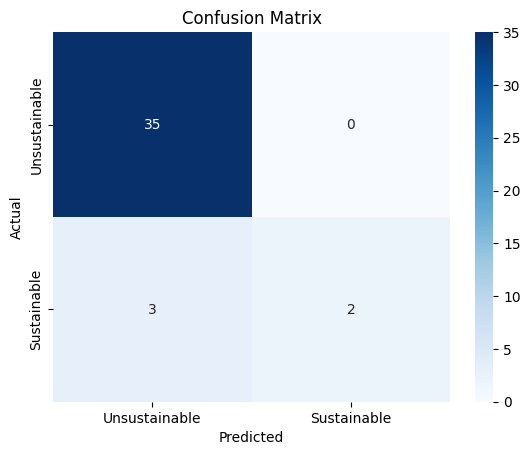

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns. heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
                xticklabels=['Unsustainable', 'Sustainable' ],
                yticklabels=['Unsustainable', 'Sustainable' ])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt. show()